In [1]:
%matplotlib inline

In [2]:
"""
Script python pour ouvrir les fichiers de traces de clavier

"""
import matplotlib.pyplot as plt
import numpy as np
import time

def read_int(f):
    ba = bytearray(4)
    f.readinto(ba)
    prm = np.frombuffer(ba, dtype=np.int32)
    return prm[0]

def read_double(f):
    ba = bytearray(8)
    f.readinto(ba)
    prm = np.frombuffer(ba, dtype=np.double)
    return prm[0]

def read_double_tab(f, n):
    ba = bytearray(8*n)
    nr = f.readinto(ba)
    if nr != len(ba):
        return []
    else:
        prm = np.frombuffer(ba, dtype=np.double)
        return prm

def get_pics_from_file(filename):
    # Lecture du fichier d'infos + pics detectes (post-processing KeyFinder)
    print("Ouverture du fichier de pics "+filename)
    f_pic = open(filename, "rb")
    info = dict()
    info["nb_pics"] = read_int(f_pic)
    print("Nb pics par trame: " + str(info["nb_pics"]))
    info["freq_sampling_khz"] = read_double(f_pic)
    print("Frequence d'echantillonnage: " + str(info["freq_sampling_khz"]) + " kHz")
    info["freq_trame_hz"] = read_double(f_pic)
    print("Frequence trame: " + str(info["freq_trame_hz"]) + " Hz")
    info["freq_pic_khz"] = read_double(f_pic)
    print("Frequence pic: " + str(info["freq_pic_khz"]) + " kHz")
    info["norm_fact"] = read_double(f_pic)
    print("Facteur de normalisation: " + str(info["norm_fact"]))
    tab_pics = []
    pics = read_double_tab(f_pic, info["nb_pics"])
    nb_trames = 1
    while len(pics) > 0:
        nb_trames = nb_trames+1
        tab_pics.append(pics)
        pics = read_double_tab(f_pic, info["nb_pics"])
    print("Nb trames: " + str(nb_trames))
    f_pic.close()
    return tab_pics, info
  
def get_pics_from_file2(filename):
  # Lecture du fichier d'infos + pics detectes (post-processing KeyFinder)
  f_pic = open(filename, "rb")
  info = dict()
  info["nb_pics"] = read_int(f_pic)
  info["freq_sampling_khz"] = read_double(f_pic)
  info["freq_trame_hz"] = read_double(f_pic)
  info["freq_pic_khz"] = read_double(f_pic)
  info["norm_fact"] = read_double(f_pic)
  tab_pics = []
  pics = read_double_tab(f_pic, info["nb_pics"])
  nb_trames = 1
  while len(pics) > 0:
    nb_trames = nb_trames+1
    tab_pics.append(pics)
    pics = read_double_tab(f_pic, info["nb_pics"])
  f_pic.close()
  return tab_pics, info

Ouverture du fichier de pics data/pics_J.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7793
Ouverture du fichier de pics data/pics_0.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 8701


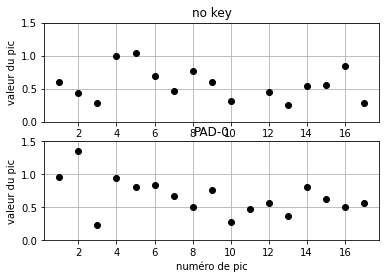

In [3]:
# Quick plot of signals to get insight on the data

if __name__ == "__main__":
    pics_nokey, info = get_pics_from_file("data/pics_J.bin")
    pics_pad0, info = get_pics_from_file("data/pics_0.bin")

    ######### Pics ############
    # NO KEY
    plt.figure(1)
    plt.subplot(211)
    plt.plot(range(1,info["nb_pics"]+1), pics_nokey[100], 'ko')
    plt.xlabel('numéro de pic')
    plt.ylabel('valeur du pic')
    plt.title('no key')
    plt.ylim(0, 1.5)
    plt.grid(b=True, which='both')
    # PAD-0
    plt.subplot(212)
    plt.plot(range(1,info["nb_pics"]+1), pics_pad0[0], 'ko')
    plt.xlabel('numéro de pic')
    plt.ylabel('valeur du pic')
    plt.title('PAD-0')
    plt.ylim(0, 1.5)
    plt.grid(b=True, which='both')
    #
    plt.show()

Ouverture du fichier de pics data/pics_LOGINMDP.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 11102


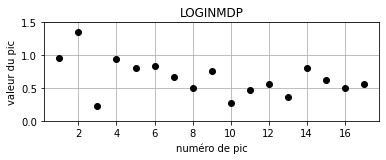

In [4]:
if __name__ == "__main__":
    pics_nokey, info = get_pics_from_file("data/pics_LOGINMDP.bin")

    ######### Pics ############
    # LOGINMDP
    plt.subplot(212)
    plt.plot(range(1,info["nb_pics"]+1), pics_pad0[0], 'ko')
    plt.xlabel('numéro de pic')
    plt.ylabel('valeur du pic')
    plt.title('LOGINMDP')
    plt.ylim(0, 1.5)
    plt.grid(b=True, which='both')
    #
    plt.show()

Ouverture du fichier de pics data/pics_A.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7610
Ouverture du fichier de pics data/pics_B.bin
Nb pics par trame: 17
Frequence d'echantillonnage: 625.0 kHz
Frequence trame: 315.0 Hz
Frequence pic: 50.0 kHz
Facteur de normalisation: 0.05
Nb trames: 7640


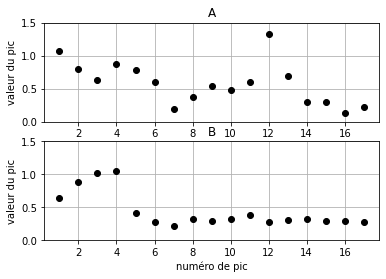

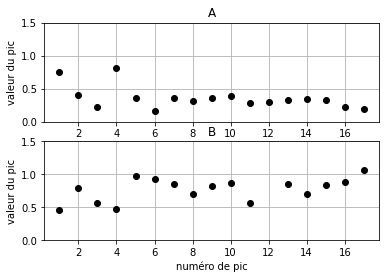

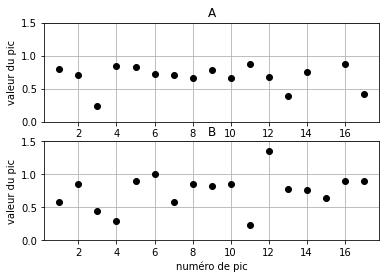

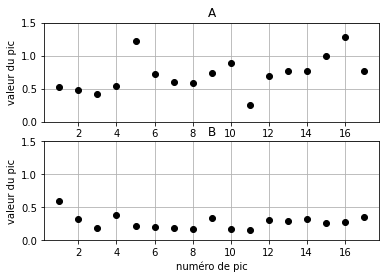

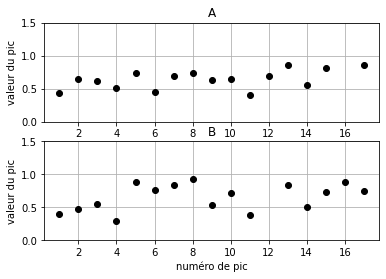

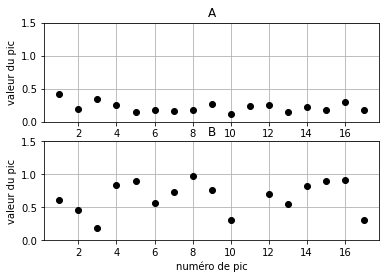

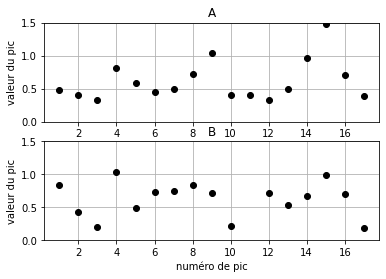

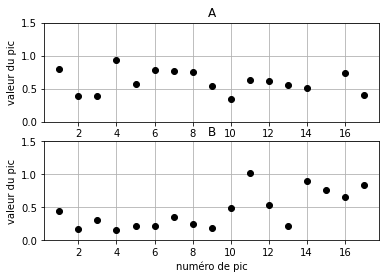

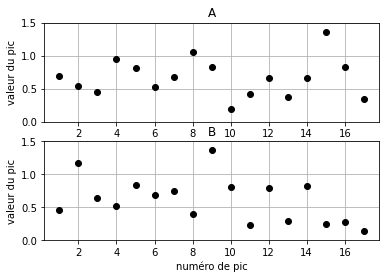

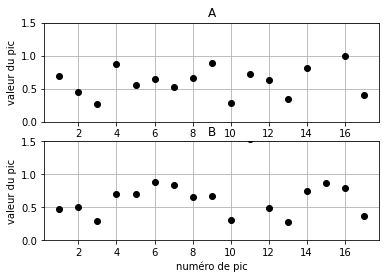

In [7]:
pics_A, info = get_pics_from_file("data/pics_A.bin")
pics_B, info = get_pics_from_file("data/pics_B.bin")

for i in range(10):
    ######### Pics ############
    # PAD-A
    plt.figure(1)
    plt.subplot(211)
    plt.plot(range(1,info["nb_pics"]+1), pics_A[i], 'ko')
    plt.xlabel('numéro de pic')
    plt.ylabel('valeur du pic')
    plt.title('A')
    plt.ylim(0, 1.5)
    plt.grid(b=True, which='both')
    # PAD-0
    plt.subplot(212)
    plt.plot(range(1,info["nb_pics"]+1), pics_B[i], 'ko')
    plt.xlabel('numéro de pic')
    plt.ylabel('valeur du pic')
    plt.title('B')
    plt.ylim(0, 1.5)
    plt.grid(b=True, which='both')
    #
    plt.show()

In [10]:
# Creating lists for data
# frames : all frames
# letters : letter correspondig to frames

import os
import pandas as pd

nb = 0
frames = []
letters = []
labl = []
for file in os.listdir("data"):
  pics, info = get_pics_from_file2("data/" + file)
  label = file.split('_')[1]
  label = label.split(".")[0]
  if (label == "LOGINMDP"):
    continue
  labl.append(label)
  frames.extend(pics)
  letters.extend([label] * len(pics))

print(labl)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'CTRL', 'D', 'E', 'ENTER', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'NOKEY', 'O', 'P', 'Q', 'R', 'S', 'SHIFT', 'SPACE', 'SUPPR', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


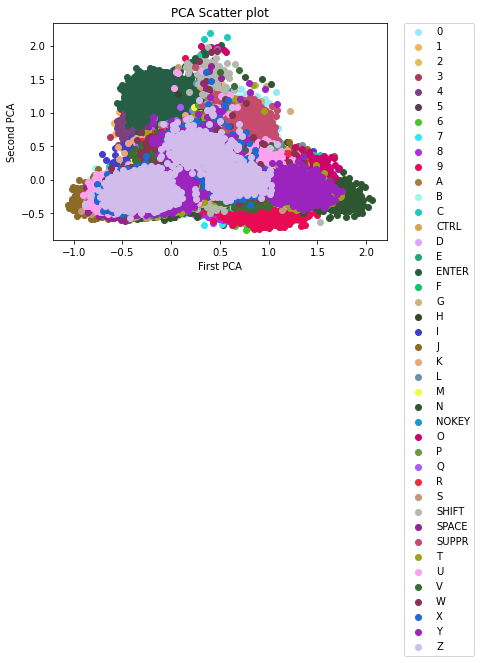

In [11]:
# Plotting 2D PCA

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

from sklearn.decomposition import PCA

rpca = PCA(n_components=3, svd_solver='randomized')
reduced_data_rpca = rpca.fit_transform(frames)

colors = np.random.rand(42,3)

letters = np.asarray(letters)

for i in range(len(colors)):
  x = reduced_data_rpca[:, 0][letters == labl[i]]
  y = reduced_data_rpca[:, 1][letters == labl[i]]
  plt.scatter(x, y, c=[colors[i]])

plt.legend(labl, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First PCA')
plt.ylabel('Second PCA')
plt.title('PCA Scatter plot')
plt.show()

In [ ]:
# Plotting 3D PCA using plotly as it's easier than matplotlib.

import plotly.express as px

rpca = PCA(n_components=3, svd_solver='randomized')
reduced_data_rpca = rpca.fit_transform(frames)

colors = np.random.rand(43,3)

fig = px.scatter_3d(
    reduced_data_rpca, x=0, y=1, z=2, color=letters,
    title=f'Total Explained Variance',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)

fig.show()

In [ ]:
# Splitting the data into train/test/validation sets.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(frames, letters, train_size=0.95, random_state=42, stratify=letters)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=0.5, random_state=42, stratify=y_test)
print(len(y_train))
print(len(y_test))
print(len(y_val))

334031
8791
8790


In [ ]:
# Tried to train a GaussianProcessClassifier, but it takes too much time.

from sklearn.gaussian_process import GaussianProcessClassifier

gpc = GaussianProcessClassifier(random_state=0, copy_X_train=False).fit(X_test, y_test)
gpc.score(X_test, y_test)
print(gpc.predict_proba(X_test))